In [1]:
import sys
sys.path.append("./attention-module/MODELS")

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
from cbam import CBAM

In [7]:
def make_block_for_conv():
    return ""
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.bn1 = nn.BatchNorm2d(64)
        self.cbam1 = CBAM(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.bn2 = nn.BatchNorm2d(128)
        self.cbam2 = CBAM(128)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.bn3 = nn.BatchNorm2d(256)
        self.cbam3 = CBAM(256)
        self.conv4 = nn.Conv2d(256, 512, 3)
        self.bn4 = nn.BatchNorm2d(512)
        self.cbam4 = CBAM(512)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(512, 300)
        self.fc2 = nn.Linear(300, 200)
        self.dropout = nn.Dropout(0.5)


    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.cbam1(x)
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.cbam2(x)
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.cbam3(x)
        x = self.pool(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.cbam4(x)
        x = self.pool(x)
        x = self.dropout(x)
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

size of validation dataset 300


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 0 Training Loss 5.249196565565747. Validation Loss 5.174155623118082 Accuracy 0.3333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 1 Training Loss 5.023061809432603. Validation Loss 4.906400356292725 Accuracy 2.3333333333333335


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 2 Training Loss 4.850894463870414. Validation Loss 4.801810601552328 Accuracy 1.3333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 3 Training Loss 4.717338149322306. Validation Loss 4.585763104756674 Accuracy 4.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 4 Training Loss 4.560974866413509. Validation Loss 4.465620466868082 Accuracy 6.333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 5 Training Loss 4.309814581253003. Validation Loss 4.332389500935872 Accuracy 5.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 6 Training Loss 4.173872368855773. Validation Loss 4.290141773223877 Accuracy 5.333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 7 Training Loss 4.039840961951392. Validation Loss 4.345409488677978 Accuracy 8.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 8 Training Loss 3.9064760629361164. Validation Loss 4.118966134389241 Accuracy 8.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 9 Training Loss 3.796650303762588. Validation Loss 4.048056564331055 Accuracy 10.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 10 Training Loss 3.598456766549269. Validation Loss 3.933369967142741 Accuracy 12.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 11 Training Loss 3.467646044097032. Validation Loss 3.8747896512349445 Accuracy 12.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 12 Training Loss 3.3944367533363207. Validation Loss 4.010439256032308 Accuracy 10.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 13 Training Loss 3.2972221530275174. Validation Loss 3.9662396558125814 Accuracy 9.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 14 Training Loss 3.219567144716837. Validation Loss 4.027920729319255 Accuracy 9.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 15 Training Loss 3.0725564483512606. Validation Loss 3.739282178878784 Accuracy 14.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 16 Training Loss 2.972048618268414. Validation Loss 3.8089080619812012 Accuracy 16.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 17 Training Loss 2.9309971350136244. Validation Loss 3.7021789805094403 Accuracy 15.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 18 Training Loss 2.861890194246046. Validation Loss 3.846759204864502 Accuracy 14.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 19 Training Loss 2.8115522650446354. Validation Loss 3.8631330744425454 Accuracy 16.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 20 Training Loss 2.714874086105325. Validation Loss 3.78196559270223 Accuracy 16.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 21 Training Loss 2.663047949640551. Validation Loss 3.813987236022949 Accuracy 17.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 22 Training Loss 2.6485687339770654. Validation Loss 3.7366854540506997 Accuracy 16.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 23 Training Loss 2.619804519580296. Validation Loss 3.8576693725585938 Accuracy 14.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 24 Training Loss 2.590257125776778. Validation Loss 3.85364133199056 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 25 Training Loss 2.5344902981696817. Validation Loss 3.9102324867248535 Accuracy 15.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 26 Training Loss 2.497263791563639. Validation Loss 3.92841064453125 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 27 Training Loss 2.4873371056435105. Validation Loss 3.8743359820048013 Accuracy 15.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 28 Training Loss 2.4506082764248034. Validation Loss 3.9036749331156413 Accuracy 14.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 29 Training Loss 2.4553062976097535. Validation Loss 3.923339951833089 Accuracy 15.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 30 Training Loss 2.3971448104591757. Validation Loss 3.935755481719971 Accuracy 17.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 31 Training Loss 2.4264408204695362. Validation Loss 3.9385538228352863 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 32 Training Loss 2.4058452515925364. Validation Loss 3.966606165568034 Accuracy 14.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 33 Training Loss 2.387639777384853. Validation Loss 3.966065985361735 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 34 Training Loss 2.3863709666329513. Validation Loss 3.9266825993855794 Accuracy 15.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 35 Training Loss 2.351389115510759. Validation Loss 3.9452995427449546 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 36 Training Loss 2.3630130770837043. Validation Loss 3.9803665351867674 Accuracy 15.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 37 Training Loss 2.356073398358955. Validation Loss 3.9712280209859214 Accuracy 15.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 38 Training Loss 2.3562780148446203. Validation Loss 3.9449338150024413 Accuracy 15.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 39 Training Loss 2.3501136393391295. Validation Loss 3.944500242869059 Accuracy 15.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 40 Training Loss 2.3463881596959513. Validation Loss 3.9241377449035646 Accuracy 15.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 41 Training Loss 2.3476868864105676. Validation Loss 3.9785992113749185 Accuracy 15.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 42 Training Loss 2.3191639228079834. Validation Loss 3.976414051055908 Accuracy 15.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 43 Training Loss 2.3666718805887257. Validation Loss 3.9445002047220865 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 44 Training Loss 2.33696618271075. Validation Loss 3.9445081392923993 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 45 Training Loss 2.321017661009247. Validation Loss 3.9864241091410317 Accuracy 15.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 46 Training Loss 2.3153175805215462. Validation Loss 4.020648008982341 Accuracy 15.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 47 Training Loss 2.3493292454798933. Validation Loss 4.044855721791586 Accuracy 15.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 48 Training Loss 2.3380659805669004. Validation Loss 3.9950538444519044 Accuracy 17.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 49 Training Loss 2.3200581463169625. Validation Loss 3.9228884506225588 Accuracy 15.0
Test Accuracy: 15 % 


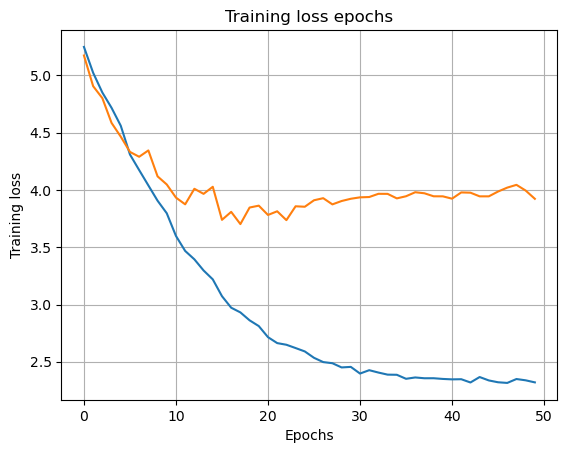

In [8]:
# I looked up how to bold words so I could make test accuracy more visible in output
bold_start = "\033[1m"
bold_end = "\033[0m"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


batch_size = 32
epochs = 50
num_classes = 200

def create_list_of_epochs(epochs):
    list_of_epochs = []
    for epoch in range(epochs):
        list_of_epochs.append(epoch)
    return list_of_epochs


train_dataset = datasets.ImageFolder("CUB_200_2011_reorganized/train",
                                     transform=transform)
length_of_inital_train_dataset = int(0.95 * len(train_dataset))
length_of_validation_dataset = len(train_dataset) - length_of_inital_train_dataset
train_dataset, validation_dataset = random_split(
    train_dataset, [length_of_inital_train_dataset, length_of_validation_dataset])
test_dataset = datasets.ImageFolder("CUB_200_2011_reorganized/test",
                                    transform=transform)

print(f"size of validation dataset {len(validation_dataset)}")

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
validation_loader = DataLoader(validation_dataset, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

model = MyNet()
model = nn.DataParallel(model)
model = model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

validation_loss_tracker = []

list_of_training_loss = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        prediction = model(images)
        loss = loss_function(prediction, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    training_loss_for_epoch = running_loss/len(train_dataset)
    list_of_training_loss.append(training_loss_for_epoch)

    model.eval()
    validation_loss = 0
    correct_for_validation = 0
    total_for_validation = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_function(outputs, labels)
            validation_loss += loss.item() * images.size(0)
            nothing, predicted = torch.max(outputs.data, 1)
            total_for_validation += labels.size(0)
            correct_for_validation += (predicted == labels).sum().item()
    avg_val_loss = validation_loss / len(validation_dataset)
    validation_loss_tracker.append(avg_val_loss)
    accuracy = 100 * correct_for_validation / total_for_validation
    print(f"Epoch {epoch} Training Loss {training_loss_for_epoch}. Validation Loss {avg_val_loss} Accuracy {accuracy}")
    scheduler.step()


correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        model.eval()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        nothing, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'{bold_start}Test Accuracy: {100 * correct // total} % {bold_end}')


list_of_epochs = create_list_of_epochs(epochs)

plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.title("Training loss epochs")
plt.plot(list_of_epochs, list_of_training_loss, label="Training Loss")
plt.plot(list_of_epochs, validation_loss_tracker, label="Validation loss")
plt.grid(True)
plt.show()
